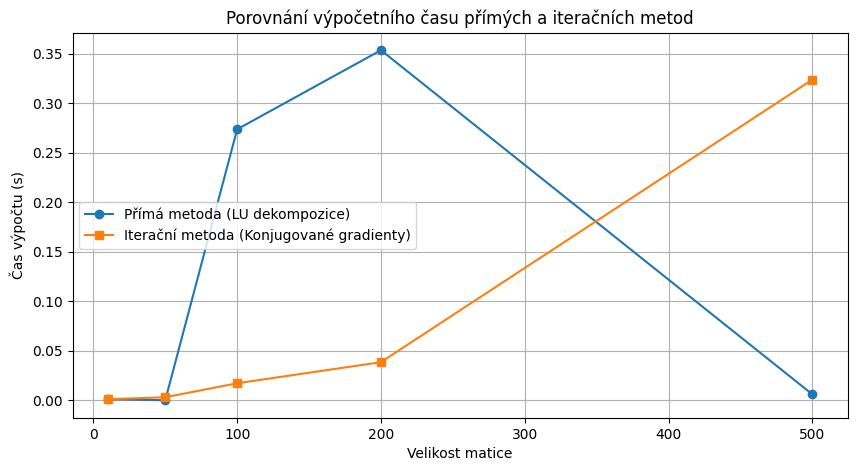

In [6]:
import numpy as np
import scipy.linalg
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

# Nastavení velikostí matic
sizes = [10, 50, 100, 200,500]
direct_times = []
iterative_times = []

for size in sizes:
    # Generování náhodné matice a vektoru
    A = np.random.rand(size, size)
    A = A @ A.T  # Zajištění, že matice je symetrická a pozitivně definitní
    b = np.random.rand(size)
    
    # Přímá metoda: LU dekompozice
    start_time = time.time()
    x_direct = scipy.linalg.solve(A, b)
    end_time = time.time()
    direct_times.append(end_time - start_time)
    
    # Iterační metoda: Metoda konjugovaných gradientů
    start_time = time.time()
    x_iterative, exit_code = scipy.sparse.linalg.cg(A, b, rtol=1e-10)
    end_time = time.time()
    iterative_times.append(end_time - start_time)

# Vykreslení grafu
plt.figure(figsize=(10, 5))
plt.plot(sizes, direct_times, 'o-', label='Přímá metoda (LU dekompozice)')
plt.plot(sizes, iterative_times, 's-', label='Iterační metoda (Konjugované gradienty)')
plt.xlabel('Velikost matice')
plt.ylabel('Čas výpočtu (s)')
plt.title('Porovnání výpočetního času přímých a iteračních metod')
plt.legend()
plt.grid(True)
plt.show()
